# Analysis

- **Observed Trend 1**: The majority of rides occur in urban locations, while the fewest rides occur in rural locations
- **Observed Trend 2**: The more rural an area, the more rides cost on average.
- **Observed Trend 3**: Most revenue (62 percent) is made in urban locations.

# Getting Started: Importing Dependencies and Data

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read in CSVs with raw data
city_csv_path = 'raw_data/city_data.csv'
ride_csv_path = 'raw_data/ride_data.csv'

city_df = pd.read_csv(city_csv_path)
ride_df = pd.read_csv(ride_csv_path)

In [3]:
# Preview city data
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
# Preview ride data
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
ride_data = pd.merge(ride_df, city_df, on='city', how='left')
ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


# Bubble Plot of Ride Sharing Data

In [6]:
# Group data by city to calculate average fare, number of rides,
# and driver count per city.
grouped_rides = ride_data.groupby('city')

# Start table with city name, driver count, and type for bubble plot,
# then add avg. fare and ride count. 
city_bubble_df = city_df[['city', 'driver_count', 'type']].set_index('city')
city_bubble_df['avg_fare'] = grouped_rides['fare'].mean()
city_bubble_df['ride_count'] = grouped_rides['city'].count()
city_bubble_df.head()

,driver_count,type,avg_fare,ride_count
city,,,,
Kelseyland,63,Urban,21.806429,28
Nguyenbury,8,Urban,25.899615,26
East Douglas,12,Urban,26.169091,22
West Dawnfurt,34,Urban,22.330345,29
Rodriguezburgh,52,Urban,21.332609,23


In [7]:
# Create bubble plot

# Add data to plot for urban locations.
urban = plt.scatter(city_bubble_df.loc[city_bubble_df['type']=='Urban', 'ride_count'],
                    city_bubble_df.loc[city_bubble_df['type']=='Urban', 'avg_fare'],
                    s=city_bubble_df.loc[city_bubble_df['type']=='Urban', 'driver_count']*4,
                    label='Urban', color='lightcoral', alpha=.6, edgecolor='black')

# Add data to plot for suburban locations.
suburban = plt.scatter(city_bubble_df.loc[city_bubble_df['type']=='Suburban', 'ride_count'],
                    city_bubble_df.loc[city_bubble_df['type']=='Suburban', 'avg_fare'],
                    s=city_bubble_df.loc[city_bubble_df['type']=='Suburban', 'driver_count']*4,
                    label='Suburban', color='lightskyblue', alpha=.6, edgecolor='black')

# Add data to plot for rural locations.
rural = plt.scatter(city_bubble_df.loc[city_bubble_df['type']=='Rural', 'ride_count'],
                    city_bubble_df.loc[city_bubble_df['type']=='Rural', 'avg_fare'],
                    s=city_bubble_df.loc[city_bubble_df['type']=='Rural', 'driver_count']*4,
                    label='Rural', color='gold', alpha=.6, edgecolor='black')

# Set x and y limits.
plt.xlim(0, 35)
plt.ylim(15, 50)

# Add a legend in the best location.
lgnd = plt.legend(handles=[urban, suburban, rural], loc='best', title='City Types')

# Set the marker sizes for each of the items in the legend.
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Add labels to the x and y axes and give the chart a title.
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare Per City ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Use seaborn library to set the grid background style.
sns.set_style('darkgrid')

# Add a note at the far right of the graph explaining what marker size indicates.
# 1 = far right, .5 = halfway up.
plt.gcf().text(1, 0.5, 'Note:\nCircle size correlates with driver count per city.', fontsize=11)

Text(1,0.5,'Note:\nCircle size correlates with driver count per city.')

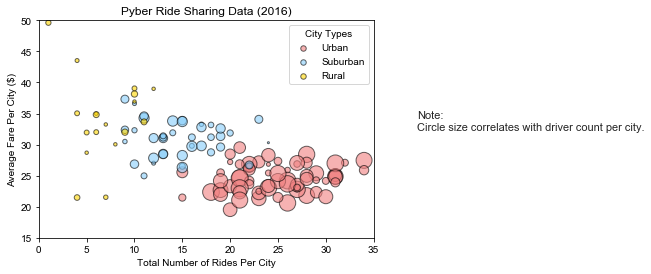

In [8]:
# Save high res figure and display plot.
plt.savefig('Pyber_Data_Bubble_Chart.png', dpi=300)
plt.show()

# Pie Chart 1: Percent of Total Fares by City Type

In [9]:
# Format a dataframe to use for developing pie charts
# that summarize data by city type.
city_types = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
city_groups = ride_data.groupby('type')
city_type_summary = pd.DataFrame(city_groups['fare'].sum()).rename(columns={'fare':'total_fares'})
city_type_summary['total_rides'] = city_groups['ride_id'].count()
city_type_summary['driver_count'] = city_df.groupby('type')['driver_count'].sum()
city_type_summary

,total_fares,total_rides,driver_count
type,,,
Rural,4255.09,125,104
Suburban,20335.69,657,638
Urban,40078.34,1625,2607


In [10]:
# Create a pie chart showing % of total fares by city type.
explode = [0, 0, .1]
plt.pie(city_type_summary['total_fares'], labels=city_types, colors=colors,
        explode=explode, shadow=True, startangle=135, autopct='%1.1f%%',
        wedgeprops={'linewidth':.5, 'edgecolor':'black'})
plt.title('% of Total Fares By City Type')

Text(0.5,1,'% of Total Fares By City Type')

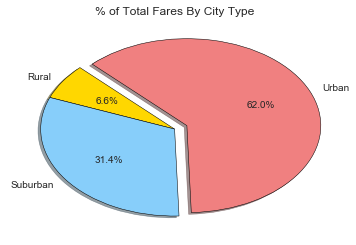

In [11]:
# Save high res figure and display plot.
plt.savefig('Percent_Total_Fares_By_City_Type.png', dpi=300)
plt.show()

# Pie Chart 2: Percent of Total Rides by City Type

In [12]:
# Create a pie chart showing % of total rides by city type.
explode = [0, 0, .1]
plt.pie(city_type_summary['total_rides'], labels=city_types, colors=colors,
        explode=explode, shadow=True, startangle=135, autopct='%1.1f%%',
        wedgeprops={'linewidth':.5, 'edgecolor':'black'})
plt.title('% of Total Rides By City Type')

Text(0.5,1,'% of Total Rides By City Type')

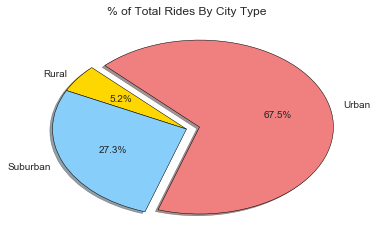

In [13]:
# Save high res figure and display plot.
plt.savefig('Percent_Total_Rides_By_City_Type.png', dpi=300)
plt.show()

# Pie Chart 3: Percent of Total Drivers by City Type

In [14]:
# Create a pie chart showing % of total drivers by city type.
explode = [0, 0, .1]
plt.pie(city_type_summary['driver_count'], labels=city_types, colors=colors,
        explode=explode, shadow=True, startangle=135, autopct='%1.1f%%',
        wedgeprops={'linewidth':.5, 'edgecolor':'black'}, pctdistance=.87)
plt.title('% of Total Drivers By City Type')

Text(0.5,1,'% of Total Drivers By City Type')

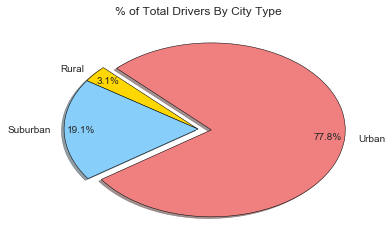

In [15]:
# Save high res figure and display plot.
plt.savefig('Percent_Total_Drivers_By_City_Type.png', dpi=300)
plt.show()